In [186]:
%load_ext autoreload
%autoreload 2
from utils import *
from IPython.display import display, HTML

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [187]:
# Columns Meta Data
bp_exon_col_meta = pd.read_csv(
    "/Users/jiayao/Work/BrainDisorders/data/expression/brainspan/exons_matrix/columns_metadata.csv", delimiter=",")
bp_exon_col_meta["Period"] = bp_exon_col_meta.apply(lambda row: ins.TemporalMap(row["age"])[0], axis=1)
bp_exon_col_meta["Stage"] = bp_exon_col_meta.apply(lambda row: ins.TemporalMap(row["age"])[1], axis=1)
bp_exon_col_meta["Description"] = bp_exon_col_meta.apply(lambda row: ins.TemporalMap(row["age"])[2], axis=1)
display(bp_exon_col_meta.head(2)) 
# Rows Meta Data
bp_exon_row_meta = pd.read_csv(
    "/Users/jiayao/Work/BrainDisorders/data/expression/brainspan/exons_matrix/rows_metadata.csv", delimiter=",")
bp_exon_row_meta["exon length"] = bp_exon_row_meta["end"] - bp_exon_row_meta["start"]
display(bp_exon_row_meta.head(2))

,column_num,donor_id,donor_name,age,gender,structure_id,structure_acronym,structure_name,Period,Stage,Description
0,1,13058,H376.IIA.51,8 pcw,M,10665,URL,upper (rostral) rhombic lip,2A,2,Early prenatal
1,2,13058,H376.IIA.51,8 pcw,M,10194,OFC,orbital frontal cortex,2A,2,Early prenatal


,row_num,gene_id,ensembl_gene_id,gene_symbol,entrez_id,start,end,exon length
0,1,1086864,ENSG00000000003,TSPAN6,7105.0,99883666,99884983,1317
1,2,1086864,ENSG00000000003,TSPAN6,7105.0,99885755,99885863,108


In [188]:
exon_exp_avg2time = pd.read_csv("/Users/jiayao/Work/BrainDisorders/data/expression/brainspan/exons_matrix/exon_exp_avg2time.csv")
exon_exp_avg2time.head(2)

,column_num,mean_2A,mean_2B,mean_3A,mean_3B,mean_4,mean_5,mean_6,mean_7,mean_8,...,var_mean_3A,var_mean_3B,var_mean_4,var_mean_5,var_mean_6,var_mean_7,var_mean_8,var_mean_9,var_mean_10,var_mean_11
0,1,27.206792,11.94528,11.393492,11.134947,9.558639,18.157519,10.861553,4.447872,6.492094,...,0.737738,0.781834,1.249085,2.249990,1.033034,0.164623,0.167769,0.324082,0.055629,0.050158
1,2,55.813774,20.93261,19.904949,21.053577,15.675466,28.367266,19.322574,7.411997,9.424933,...,3.106944,3.634774,4.036335,5.605992,3.637806,0.514675,0.495950,1.230839,0.141350,0.122251


In [193]:
Regionsgt20 = ['OFC', 'VFC', 'HIP', 'ITC', 'AMY', 'DFC', 'STC', 'MFC', 'STR', 'IPC', 
            'V1C', 'S1C', 'A1C', 'M1C', 'CBC', 'MD']
Regions = ["OFC", "VFC", "ITC", "DFC", "STC", "MFC"]
ins = BrainSpan()

In [190]:
SynVarFile = "/Users/jiayao/Work/BrainDisorders/data/DenovoVariants/wigler2014ProSYN.xlsx"
syn_annotated_exon_row_meta = ins.AssignVar2Exon3(bp_exon_row_meta, SynVarFile, IntersectionWithPredicted=False)
bp_exon_row_meta_syn_with_gene = syn_annotated_exon_row_meta[syn_annotated_exon_row_meta["GeneHited"]=="T"]
bp_exon_row_meta_syn_with_gene.to_excel("GenesExonsTargetedBySYN.xlsx", index=False)
bp_exon_row_meta_syn_with_var = bp_exon_row_meta_syn_with_gene[bp_exon_row_meta_syn_with_gene["Vars"]!=""]
bp_exon_row_meta_syn_without_var = bp_exon_row_meta_syn_with_gene[bp_exon_row_meta_syn_with_gene["Vars"]==""]
print bp_exon_row_meta_syn_with_gene.shape, bp_exon_row_meta_syn_with_var.shape, bp_exon_row_meta_syn_without_var.shape

309222(12454, 15) (615, 15) (11839, 15)


Targeted
200
Other
4899


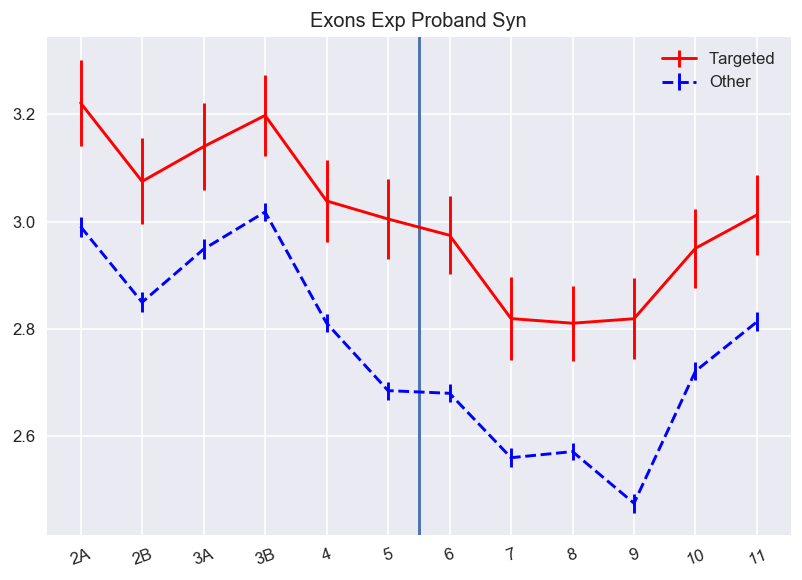

1.37483283203 1.56557178763 -0.190738955601


In [194]:
selected_exons = list(bp_exon_row_meta_syn_with_var["row_num"])
#selected_exons.remove(200855)
Notselected_exons = list(bp_exon_row_meta_syn_without_var["row_num"])
#Notselected_exons = random.sample(Notselected_exons, 2000)
Select_UnSelect = dict(zip(["Targeted", "Other"],[("r", selected_exons),("b", Notselected_exons)]))
ins.LookALLMutationTargetedExon4("Proband Syn", Select_UnSelect, bp_exon_row_meta, exon_exp_avg2time, method="mean")

In [ ]:
print exon_exp_avg2time.iloc[148206-1, 1:13].values
print exon_exp_avg2time.iloc[200855-1, 1:13].values

In [195]:
VarFile = "/Users/jiayao/Work/BrainDisorders/data/DenovoVariants/wigler2014LGD.xlsx"
bp_exon_row_meta_wiglerLGD = ins.AssignVar2Exon3(bp_exon_row_meta, VarFile)
bp_exon_row_meta_with_gene = bp_exon_row_meta_wiglerLGD[bp_exon_row_meta_wiglerLGD["GeneHited"]=="T"]
bp_exon_row_meta_with_gene.to_excel("GenesExonsTargetedByLGD_wilger2014_predicted.xlsx", index=False)
print bp_exon_row_meta_with_gene.groupby('gene_symbol').count().shape
bp_exon_row_meta_with_var = bp_exon_row_meta_with_gene[bp_exon_row_meta_with_gene["Vars"]!=""]
bp_exon_row_meta_without_var = bp_exon_row_meta_with_gene[bp_exon_row_meta_with_gene["Vars"]==""]
print bp_exon_row_meta_with_gene.shape, bp_exon_row_meta_with_var.shape, bp_exon_row_meta_without_var.shape

309222(94, 14)
(2269, 15) (118, 15) (2151, 15)


Targeted
7
Other
391


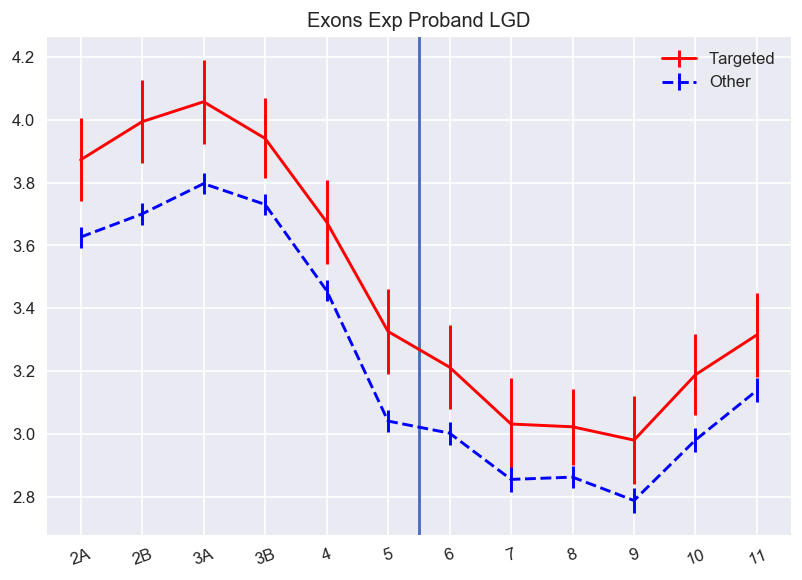

1.51368460238 1.12300840816 0.390676194219


In [203]:
selected_exons = list(bp_exon_row_meta_with_var["row_num"])
Notselected_exons = list(bp_exon_row_meta_without_var["row_num"])
Select_UnSelect = dict(zip(["Targeted", "Other"],[("r", selected_exons),("b", Notselected_exons)]))
dropbs = ins.LookALLMutationTargetedExon4("Proband LGD", Select_UnSelect, bp_exon_row_meta, exon_exp_avg2time, method="mean")

In [204]:
print dropbs

[13108, 78000, 155895, 173658, 178006, 211016, 213516, 1262, 1276, 1277, 1981, 1991, 5906, 5909, 5911, 5919, 8752, 8763, 8765, 8767, 8768, 8769, 11532, 11533, 11538, 11540, 11545, 13103, 13116, 14597, 26714, 28304, 31151, 31165, 31166, 34543, 34544, 34565, 34581, 35752, 35776, 35976, 35978, 35979, 39015, 39016, 39017, 39018, 39019, 39020, 39021, 39023, 39024, 39027, 39029, 39033, 39044, 40532, 40533, 40534, 40615, 40617, 40618, 41153, 41154, 44409, 44419, 44420, 44424, 44425, 44426, 44427, 44428, 44429, 44430, 44432, 47538, 48326, 48329, 48349, 48353, 48354, 48355, 53218, 53221, 53222, 53223, 54480, 54487, 54488, 54574, 54577, 54578, 54579, 55714, 55715, 55716, 55718, 55720, 55722, 61165, 61168, 61169, 61170, 61171, 61172, 61173, 61174, 61175, 61176, 65205, 65209, 66471, 66479, 66484, 66485, 66487, 66488, 66490, 66491, 66493, 66494, 66495, 66496, 66498, 66500, 66503, 67421, 67423, 70027, 70047, 70050, 72949, 72954, 72955, 73041, 73042, 73044, 73045, 73053, 73061, 73062, 75105, 75106, 7

In [209]:
display(bp_exon_row_meta_with_gene[bp_exon_row_meta_with_gene["row_num"].isin(dropbs)])

,row_num,gene_id,ensembl_gene_id,gene_symbol,entrez_id,start,end,exon length,NVIQ70,VIQ70,Gender,Func,Vars,GeneHited,Last
1261,1262.0,1086943.0,ENSG00000005108,THSD7A,221981.0,11466292.0,11466298.0,6.0,,,,,,T,F
1275,1276.0,1086943.0,ENSG00000005108,THSD7A,221981.0,11790762.0,11790979.0,217.0,,,,,,T,F
1276,1277.0,1086943.0,ENSG00000005108,THSD7A,221981.0,11871382.0,11871824.0,442.0,,,,,,T,T
1980,1981.0,1086984.0,ENSG00000006062,MAP3K14,9020.0,43348118.0,43348588.0,470.0,,,,Chromatin,,T,F
1990,1991.0,1086984.0,ENSG00000006062,MAP3K14,9020.0,43394325.0,43394414.0,89.0,,,,Chromatin,,T,T
5905,5906.0,1087222.0,ENSG00000015171,ZMYND11,10771.0,181008.0,181242.0,234.0,,,,TF&RBP,,T,F
5908,5909.0,1087222.0,ENSG00000015171,ZMYND11,10771.0,243850.0,243945.0,95.0,,,,TF&RBP,,T,F
5910,5911.0,1087222.0,ENSG00000015171,ZMYND11,10771.0,264394.0,264439.0,45.0,,,,TF&RBP,,T,F
5918,5919.0,1087222.0,ENSG00000015171,ZMYND11,10771.0,290410.0,290540.0,130.0,,,,TF&RBP,,T,F
8751,8752.0,1087398.0,ENSG00000036257,CUL3,8452.0,225349927.0,225350101.0,174.0,,,,Chromatin,,T,F


In [197]:
MisVarFile = "/Users/jiayao/Work/BrainDisorders/data/DenovoVariants/wigler2014ProMIS.xlsx"
mis_annotated_exon_row_meta = ins.AssignVar2Exon3(bp_exon_row_meta, MisVarFile, IntersectionWithPredicted=False)
bp_exon_row_meta_mis_with_gene = mis_annotated_exon_row_meta[mis_annotated_exon_row_meta["GeneHited"]=="T"]
bp_exon_row_meta_mis_with_gene.to_excel("GenesExonsTargetedByMIS.xlsx", index=False)
bp_exon_row_meta_mis_with_var = bp_exon_row_meta_mis_with_gene[bp_exon_row_meta_mis_with_gene["Vars"]!=""]
bp_exon_row_meta_mis_without_var = bp_exon_row_meta_mis_with_gene[bp_exon_row_meta_mis_with_gene["Vars"]==""]
print bp_exon_row_meta_mis_with_gene.shape, bp_exon_row_meta_mis_with_var.shape, bp_exon_row_meta_mis_without_var.shape

309222(30127, 15) (1583, 15) (28544, 15)


Targeted
462
Other
10841


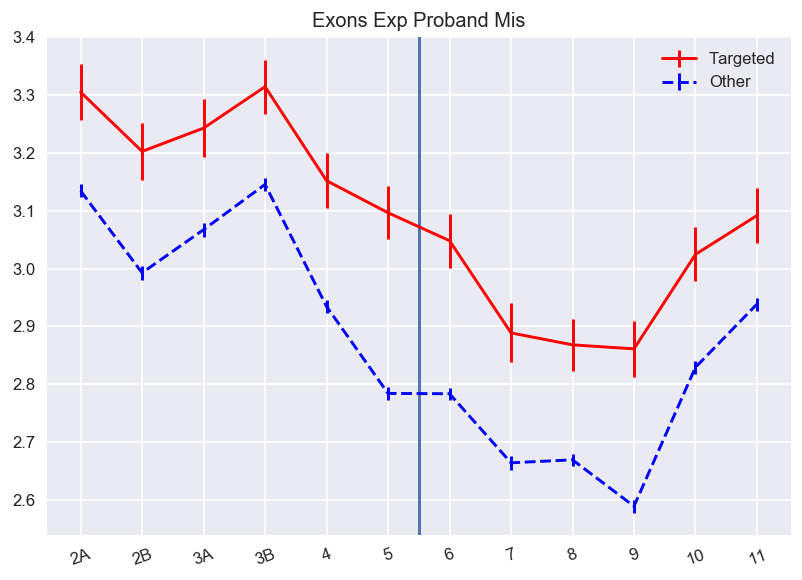

1.25434851505 1.30767476279 -0.0533262477383


In [198]:
selected_exons = list(bp_exon_row_meta_mis_with_var["row_num"])
Notselected_exons = list(bp_exon_row_meta_mis_without_var["row_num"])
Select_UnSelect = dict(zip(["Targeted", "Other"],[("r", selected_exons),("b", Notselected_exons)]))
ins.LookALLMutationTargetedExon4("Proband Mis", Select_UnSelect, bp_exon_row_meta, exon_exp_avg2time)

In [199]:
SibNSYNVarFile = "/Users/jiayao/Work/BrainDisorders/data/DenovoVariants/wigler2014SibSYN.xlsx"
sibnsyn_annotated_exon_row_meta = ins.AssignVar2Exon3(bp_exon_row_meta, SibNSYNVarFile, IntersectionWithPredicted=False)
bp_exon_row_meta_sibnsyn_with_gene = sibnsyn_annotated_exon_row_meta[sibnsyn_annotated_exon_row_meta["GeneHited"]=="T"]
bp_exon_row_meta_sibnsyn_with_gene.to_excel("GenesExonsTargetedBySYN.xlsx", index=False)
bp_exon_row_meta_sibnsyn_with_var = bp_exon_row_meta_sibnsyn_with_gene[bp_exon_row_meta_sibnsyn_with_gene["Vars"]!=""]
bp_exon_row_meta_sibnsyn_without_var = bp_exon_row_meta_sibnsyn_with_gene[bp_exon_row_meta_sibnsyn_with_gene["Vars"]==""]
print bp_exon_row_meta_sibnsyn_with_gene.shape, bp_exon_row_meta_sibnsyn_with_var.shape, bp_exon_row_meta_sibnsyn_without_var.shape

309222(8737, 15) (465, 15) (8272, 15)


Targeted
170
Other
3326


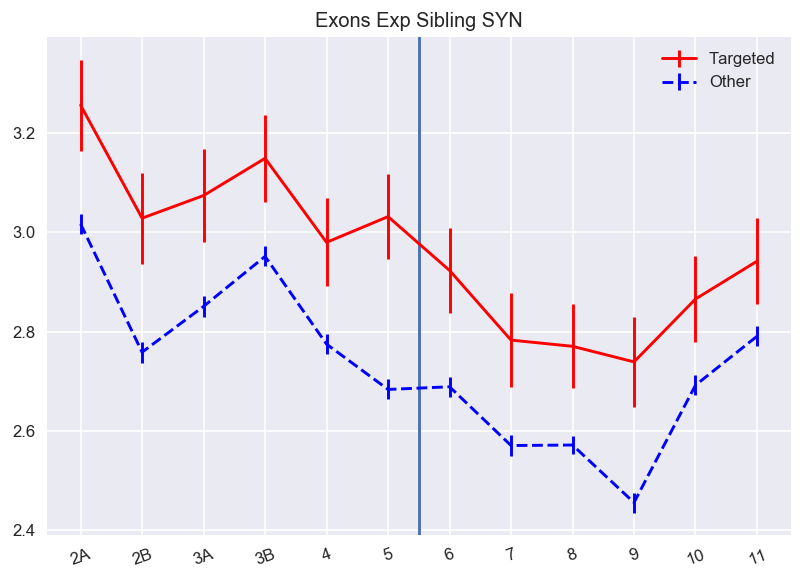

1.48492858809 1.25503583052 0.229892757564


In [200]:
selected_exons = list(bp_exon_row_meta_sibnsyn_with_var["row_num"])
#selected_exons = random.sample(selected_exons, 1239)
Notselected_exons = list(bp_exon_row_meta_sibnsyn_without_var["row_num"])
#Notselected_exons = random.sample(Notselected_exons, 2000)
Select_UnSelect = dict(zip(["Targeted", "Other"],[("r", selected_exons),("b", Notselected_exons)]))
ins.LookALLMutationTargetedExon4("Sibling SYN", Select_UnSelect, bp_exon_row_meta, exon_exp_avg2time, method="mean")

In [201]:
SibLGDVarFile = "/Users/jiayao/Work/BrainDisorders/data/DenovoVariants/wigler2014SibLGD.xlsx"
siblgd_annotated_exon_row_meta = ins.AssignVar2Exon3(bp_exon_row_meta, SibLGDVarFile, IntersectionWithPredicted=False)
bp_exon_row_meta_siblgd_with_gene = siblgd_annotated_exon_row_meta[siblgd_annotated_exon_row_meta["GeneHited"]=="T"]
bp_exon_row_meta_siblgd_with_gene.to_excel("GenesExonsTargetedByLGD.xlsx", index=False)
bp_exon_row_meta_siblgd_with_var = bp_exon_row_meta_siblgd_with_gene[bp_exon_row_meta_siblgd_with_gene["Vars"]!=""]
bp_exon_row_meta_siblgd_without_var = bp_exon_row_meta_siblgd_with_gene[bp_exon_row_meta_siblgd_with_gene["Vars"]==""]
print bp_exon_row_meta_siblgd_with_gene.shape, bp_exon_row_meta_siblgd_with_var.shape, bp_exon_row_meta_siblgd_without_var.shape

309222(3769, 15) (178, 15) (3591, 15)


Targeted
57
Other
1568


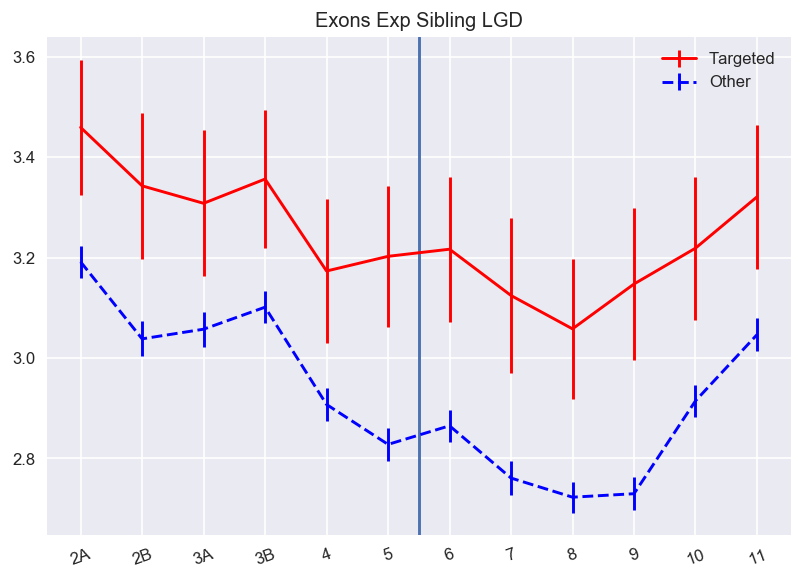

1.71829044254 2.04616002329 -0.327869580747


In [202]:
selected_exons = list(bp_exon_row_meta_siblgd_with_var["row_num"])
Notselected_exons = list(bp_exon_row_meta_siblgd_without_var["row_num"])
#Notselected_exons = random.sample(Notselected_exons, 2000)
Select_UnSelect = dict(zip(["Targeted", "Other"],[("r", selected_exons),("b", Notselected_exons)]))
ins.LookALLMutationTargetedExon4("Sibling LGD", Select_UnSelect, bp_exon_row_meta, exon_exp_avg2time)

In [ ]:
seq = range(1,20)
print np.mean(seq)
print np.mean( [np.mean(seq[1:3]), np.mean(seq[3:15]), np.mean(seq[15:21] )])